# By: Maithili Desai

## Tasks - 6 - Prediction using Decision Tree Algorithm

## Introduction
The dataset utilized here is iris dataset. You can find it [here](https://bit.ly/3kXTdox).

### Aim
- Create the Decision Tree classifier and visualize it graphically
- By feeding any new data to this classifer, should be able to predict the right class accordingly

### Importing libraries

In [1]:
# Importing necessary libraries
import sklearn.datasets as datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing dataset

In [2]:
# Loading the iris dataset
iris=datasets.load_iris()

# Converting the dataset into dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

y=iris.target
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Explorating Analysis (Progammetic Assessment)
- Checking for missing values
- Checking the datatypes
- Exploring summary statistics
- Checking correlation among features

In [3]:
# Checking for null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
# Summary statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Feature correlation
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


From this we can say that, sepal length, petal length and petal width have strong positive correlation with one another. But sepal width has weak negative correlation with rest of the features.

### Explorating Analysis (Visual Assessment)

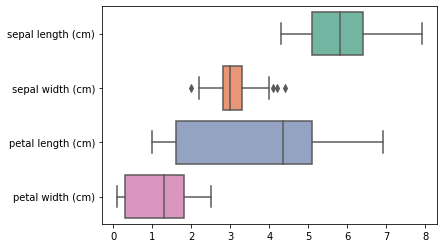

In [6]:
sns.boxplot(data=df, orient="h", palette="Set2")

We can observe that:
- Petal length has the highest variation and range among all the features
- Petal width has the lowest variation among all the features
- Sepal width has few outliers
- Distribution of sepal width is towards the higher side while distribution of petal width is to the lower side

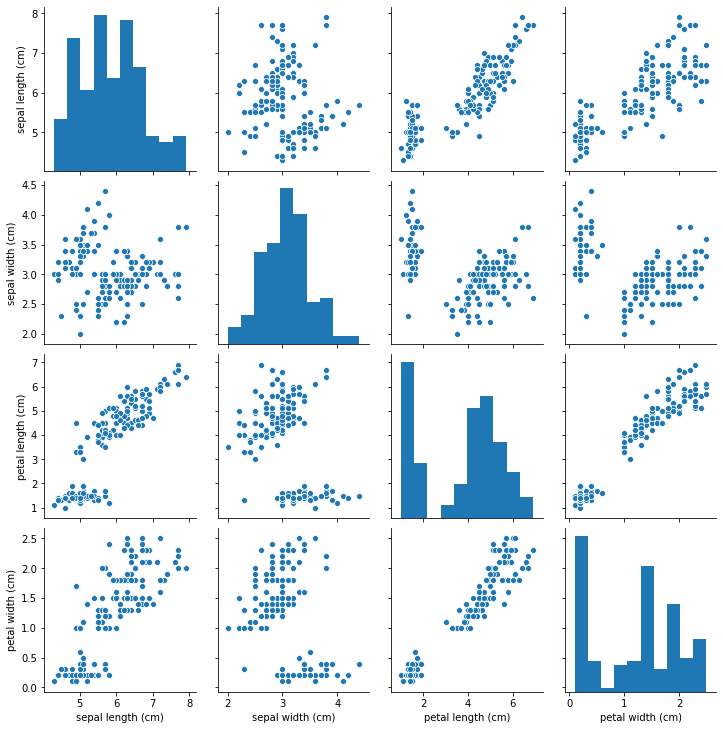

In [7]:
sns.pairplot(df);

### Decision Tree Algorithm

In [8]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.30, random_state = 0)

In [9]:
print('Shape of X_train is: {}\nShape of y_train is: {}'.format(X_train.shape, y_train.shape))

Shape of X_train is: (105, 4)
Shape of y_train is: (105,)


In [10]:
print('Shape of X_test is: {}\nShape of y_test is: {}'.format(X_test.shape, y_test.shape))

Shape of X_test is: (45, 4)
Shape of y_test is: (45,)


In [11]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [12]:
# Classifier
dtree

DecisionTreeClassifier()

In [13]:
# Making prediction using test data
predictions = dtree.predict(X_test)

In [14]:
# Measuring algorithm performance
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix :-\n",confusion_matrix(y_test,predictions))

print("\nClassification Report :- \n",classification_report(y_test,predictions))

Confusion Matrix :-
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



- Overall the algorithm has good accuracy, recall, precision and f1-score
- The algorithm has only misclassified 1 data point

### Decision Tree Visualization

In [15]:
from sklearn import tree
import matplotlib.pyplot as plt

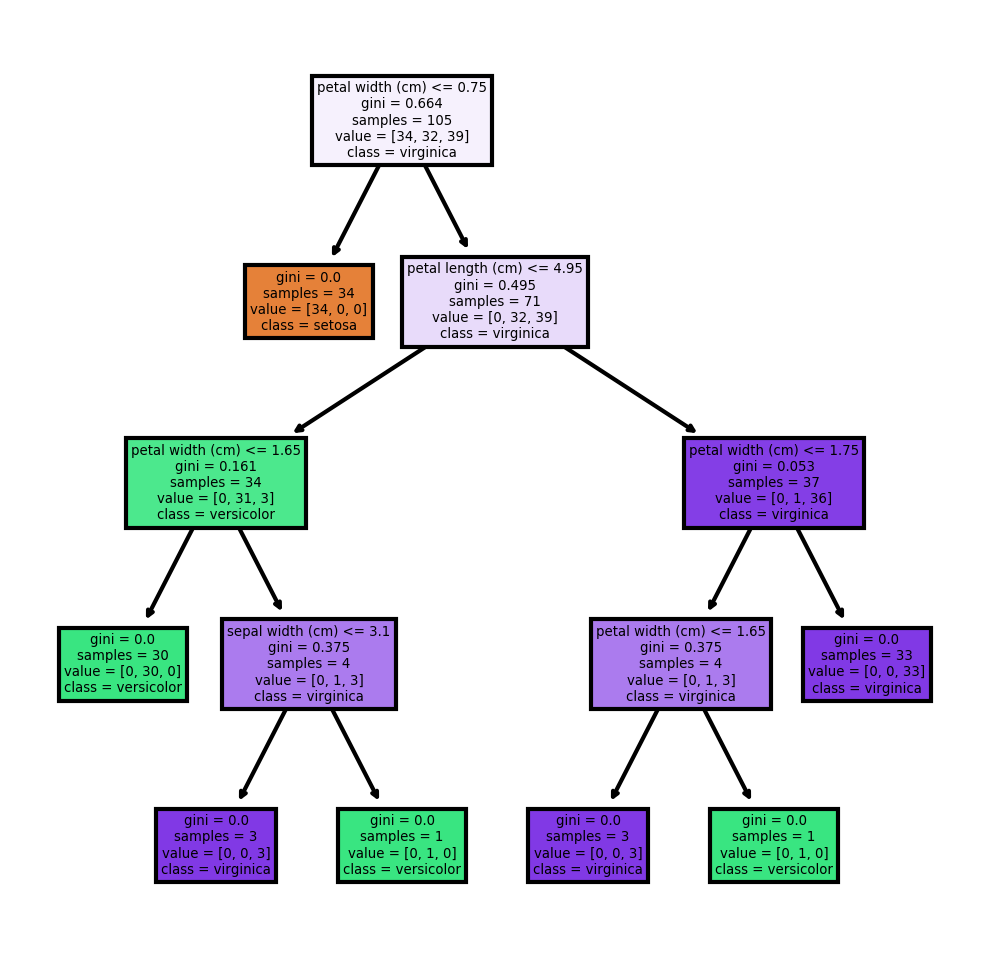

In [16]:
# Feature names and class names
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']

fig, axes = plt.subplots(figsize = (4,4), dpi=300)
tree.plot_tree(dtree, feature_names = fn, class_names = cn, filled = True);

### Conclusion
Thus Decision Tree Classifier is successfully created and it's performance is validated.